## Prueba #0502

### "Reconocimiento de actividad humana" 

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Realizar la EDA.
- Realizar el preprocesamiento de los datos.
- Optimice y pruebe un modelo predictivo de su elección.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias.
%matplotlib inline

#### Leer los datos:
La explicación sobre el conjunto de datos se puede encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [2]:
# Ir al directorio dónde se ecuentra el fichero 
os.chdir(r'C:\Users\cocol\Samsung IA\3. Maching Learning\Enunciados-20211115\Data')                # Reemplazar por la ruta adecuada

In [3]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [4]:
df.shape

(19622, 160)

In [5]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

1). Realice la EDA. Compruebe los valores faltantes. SUGERENCIA: La variable de respuesta es 'clase'.

In [6]:
df.head(3)

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A


In [7]:
# Analisis de los datos (EDA - Exploratory Data Analysis)
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,2.049277e+05,288222.879958,247.909554,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.322490e+09,294.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,1.322673e+09,252912.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,1.322833e+09,496380.000000,424.000000,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,1.323084e+09,751890.750000,644.000000,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,1.323095e+09,998801.000000,864.000000,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


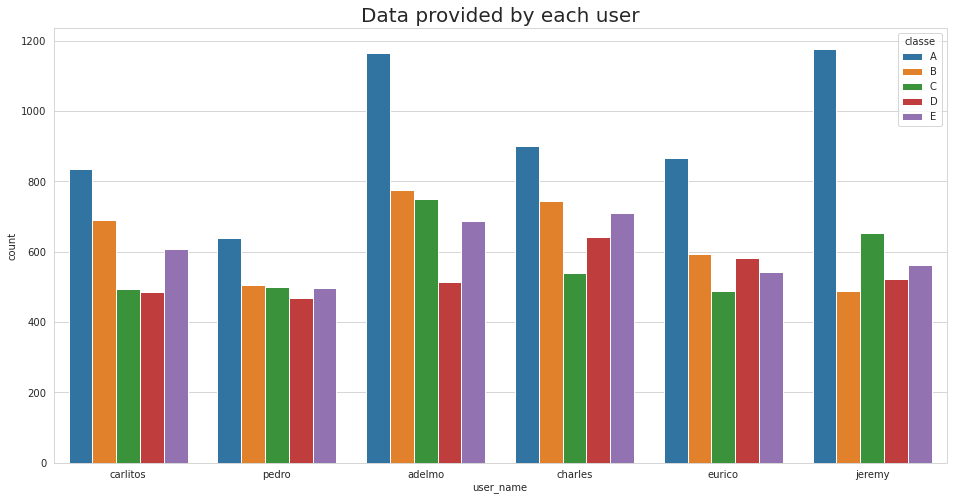

In [8]:
# Vemos los datos de los participantes

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='user_name',hue='classe', data = df)    
plt.show()

In [9]:
# Comprobacion de valores faltantes
nu = df.isnull().sum(axis=0)
print(nu)

Unnamed: 0              0
user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
cvtd_timestamp          0
                       ..
accel_forearm_z         0
magnet_forearm_x        0
magnet_forearm_y        0
magnet_forearm_z        0
classe                  0
Length: 160, dtype: int64


In [10]:
df.isnull().mean(axis = 0)    # muestra la media de cada columna 

Unnamed: 0              0.0
user_name               0.0
raw_timestamp_part_1    0.0
raw_timestamp_part_2    0.0
cvtd_timestamp          0.0
                       ... 
accel_forearm_z         0.0
magnet_forearm_x        0.0
magnet_forearm_y        0.0
magnet_forearm_z        0.0
classe                  0.0
Length: 160, dtype: float64

2). Elimine las columnas que tengan más del 97% de valores perdidos.

In [11]:
# para ver el tanto por ciento de los valores faltantes de todos los datos 
#def missing(dff):
    #print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

#missing(df)

In [12]:
# muestra las columnas cuyos valores perdidos son mayores a 0.97
missing_features = df[df.columns[df.isnull().mean() > 0.97]]  
# elimina las columnas con los valores perdidos
df.drop(missing_features, axis = 1, inplace= True)

print('Tamaño : ',df.shape)

Tamaño :  (19622, 60)


3). Elimine de las columnas innecesarias. SUGERENCIA: Aquellas columnas con "time" en el nombre y aquellas que obviamente son innecesarias.

In [13]:
df.columns.str.contains('time')   # muestra True las columnas con la palabra 'time'

array([False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [14]:
# Con filter filtro las col (axis=1) que contienen 'time'
# con columns doy el nombre de dichas columnas
filtrado_time = df.filter(like='time', axis=1).columns 
print(filtrado_time)
# elimino las columnas filtradas
df = df.drop(filtrado_time , axis=1)
print(df.shape)

Index(['raw_timestamp_part_1', 'raw_timestamp_part_2', 'cvtd_timestamp'], dtype='object')
(19622, 57)


In [15]:
# Compruebo si hay datos perdidos nuevamente 

comprobacion = df.isnull().sum(axis=0)
print(comprobacion)

Unnamed: 0              0
user_name               0
new_window              0
num_window              0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbell_z        0
accel_dumbbell_x        0
accel_dumbbe

In [16]:
df.head(3)

,Unnamed: 0,user_name,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,no,11,1.41,8.07,-94.4,3,0.00,0.0,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,no,11,1.41,8.07,-94.4,3,0.02,0.0,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,no,11,1.42,8.07,-94.4,3,0.00,0.0,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A


In [17]:
# Eliminación de algunas columnas que no son necesarias
df = df.drop(columns =['Unnamed: 0', 'user_name', 'new_window'])

print(df.shape)
df.head(3)

(19622, 54)


,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,11,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,11,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,11,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A


4). Codifique la etiqueta de la variable de respuesta. SUGERENCIA: use preprocessing.LabelEncoder ().

In [18]:
# Codificación de la etiqueta de la variable respuesta 
label_encoder = preprocessing.LabelEncoder()
df['classe'] = label_encoder.fit_transform(df['classe'])
df['classe'].unique()

array([0, 1, 2, 3, 4])

5). Realizar escalado min-max de las variables exploratorias. SUGERENCIA: utilice preprocesamiento.MinMaxScaler ().

In [19]:
# Separo los datos en X e Y
X = df.drop(columns=['classe'])
Y = df.classe
print(X.shape, Y.shape)

(19622, 53) (19622,)


In [20]:
# Separación en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(13735, 53)
(5887, 53)
(13735,)
(5887,)


In [22]:
# realizo la normalización MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

6). Elija un algoritmo y realice el análisis predictivo.
- Optimizar el (los) hiperparámetro (s)
- Calcule la precisión.
- Consiga una precisión superior al 90%.

In [25]:
# k-nearest neighbors classifier 

# los hiperametros
hyperparameters = {
    'n_neighbors' : np.arange(1,20,1)
}
# uso el clasificador 
knn = KNeighborsClassifier()
# Usamos GridSearch
clf = GridSearchCV(knn,hyperparameters,cv=5)
# fit del modelo
best_model = clf.fit(X_train_norm,Y_train)
best_n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']

print('Mejor n_neighbors : ', best_n_neighbors)

Mejor n_neighbors :  1


In [26]:
# Mejor n_neighbors
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train_norm,Y_train)
y_pred = knn.predict(X_test_norm)
precision = metrics.accuracy_score(Y_test,y_pred)

print('The accuracy is : ' + str(precision))
print(metrics.classification_report(Y_test,y_pred))

The accuracy is : 0.989128588415152
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1665
           1       0.99      0.99      0.99      1139
           2       0.98      0.98      0.98      1006
           3       0.98      0.98      0.98       979
           4       1.00      0.99      0.99      1098

    accuracy                           0.99      5887
   macro avg       0.99      0.99      0.99      5887
weighted avg       0.99      0.99      0.99      5887

